In [4]:
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append("..")

import numpy as np
from utility import Utility
from test_average import evaluate
from qiskit.quantum_info import random_unitary
from logger import Logger
from quantum_state import QuantumState
import copy
import matplotlib.pyplot as plt
from povm import Povm
from quantum_measurement import QuantumMeasurement
from qiskit.quantum_info.operators.operator import Operator

In [6]:
def print_vector(vec):
    for e in vec:
        print(f'{e:.4f}', end=', ')
    print()

# 1 The Unitary Operator

In [7]:
num_sensor = 3
theta = 31
seed =  2
RAD = 180/np.pi

unitary_operator = Utility.generate_unitary_operator(theta, seed)
Utility.print_matrix('Unitary Operator:', unitary_operator.data)

Unitary Operator:
( 0.85717+0.43483i) ( 0.19779-0.19253i) 
(-0.19779-0.19253i) ( 0.85717-0.43483i) 


### 1.1 Verify if $(U^{\dagger} \otimes U \otimes I $) is unitary if $U$ is unitary

In [8]:
for theta in range(1, 102, 10):
    for seed in range(10):
        U = Utility.generate_unitary_operator(theta, seed)
        U_inv = Operator(np.linalg.inv(U.data))
        I = Operator(np.eye(2))
        prod = U_inv.tensor(U)
        prod = prod.tensor(I)
        print(prod.is_unitary(), end=' ')

True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True 

### 1.2 Eigen value and eigen vector of $U$

In [9]:
U = Utility.generate_unitary_operator(theta, seed)
e_vals, e_vectors = np.linalg.eig(U.data)

print('eigen values')
print_vector(e_vals)
print(f'theta = {Utility.get_theta(e_vals[0].real, e_vals[0].imag) * RAD}')
print('eigen vectors')
ev = []
for i in range(len(e_vectors[0])):
    print(f'vec{i}: ', end = '')
    ev.append(e_vectors[:, i])
    print_vector(ev[-1])

eigen values
-0.1908-0.9816j, -0.1908+0.9816j, 
theta = 259.0
eigen vectors
vec0: 0.7746+0.0000j, -0.4819-0.4095j, 
vec1: 0.4819-0.4095j, 0.7746+0.0000j, 


In [153]:
print(abs(np.dot(np.conj(ev[0]), ev[1])))

1.3943372487965712e-16


### 1.2.1 eigenvectors of $u_{\pm} \otimes u_{\pm}$, orthogonal?

In [154]:
print_vector(np.kron(ev[0], ev[1]))
print_vector(np.kron(ev[0], ev[0]))
print_vector(np.kron(ev[1], ev[0]))
print_vector(np.kron(ev[1], ev[1]))
vec = []
vec.append(np.kron(ev[0], ev[1]))
vec.append(np.kron(ev[0], ev[0]))
vec.append(np.kron(ev[1], ev[0]))
vec.append(np.kron(ev[1], ev[1]))

0.1869+0.1920j, 0.9221+0.0000j, -0.0779+0.0000j, -0.1869+0.1920j, 
0.9221+0.0000j, -0.1869+0.1920j, -0.1869+0.1920j, -0.0021-0.0778j, 
0.1869+0.1920j, -0.0779+0.0000j, 0.9221+0.0000j, -0.1869+0.1920j, 
-0.0021+0.0778j, 0.1869+0.1920j, 0.1869+0.1920j, 0.9221+0.0000j, 


In [155]:
for i in range(len(vec)):
    for j in range(i + 1, len(vec)):
        tmp = np.dot(np.conj(vec[i]), vec[j])
        print(i, j, abs(tmp))

0 1 1.2404182639872388e-16
0 2 0.0
0 3 1.0007415106216802e-16
1 2 1.153297605929378e-16
1 3 1.2638295033559196e-17
2 3 1.2412670766236366e-16


### 1.2.1 eigenvectors of $u_{\pm} \otimes u_{\pm} \otimes u_{\pm}$, orthogonal?

In [157]:
vec3 = []
vec3.append(np.kron(np.kron(ev[0], ev[0]), ev[0]))
vec3.append(np.kron(np.kron(ev[1], ev[0]), ev[0]))
vec3.append(np.kron(np.kron(ev[0], ev[1]), ev[0]))
vec3.append(np.kron(np.kron(ev[1], ev[1]), ev[0]))
vec3.append(np.kron(np.kron(ev[0], ev[0]), ev[1]))
vec3.append(np.kron(np.kron(ev[1], ev[0]), ev[1]))
vec3.append(np.kron(np.kron(ev[1], ev[0]), ev[1]))
vec3.append(np.kron(np.kron(ev[1], ev[1]), ev[1]))

In [ ]:
for i in range(len(vec3)):
    for j in range(i + 1, len(vec3)):
        tmp = np.dot(np.conj(vec3[i]), vec3[j])
        print(i, j, abs(tmp))

### 1.3 Eigen value and eigen vector of $(U^{\dagger} \otimes U$)

In [111]:
U = Utility.generate_unitary_operator(theta, seed)
U_inv = Operator(np.linalg.inv(U.data))
prod = U_inv.tensor(U)
e_vals, e_vectors = np.linalg.eig(prod.data)

print('eigen values')
print_vector(e_vals)
print(f'theta = {Utility.get_theta(e_vals[2].real, e_vals[2].imag) * RAD}')
print('eigen vectors')
evv = []
for i in range(len(e_vectors[0])):
    print(f'vec{i}: ', end = '')
    evv.append(e_vectors[:, i])
    print_vector(evv[-1])

eigen values
0.1736-0.9848j, 1.0000-0.0000j, 0.1736+0.9848j, 1.0000+0.0000j, 
theta = 80.0
eigen vectors
vec0: 0.1869+0.1920j, 0.9221+0.0000j, -0.0779-0.0000j, -0.1869+0.1920j, 
vec1: 0.9254+0.0000j, -0.1705+0.1752j, -0.1705+0.1752j, -0.0042-0.1551j, 
vec2: 0.1869+0.1920j, -0.0779+0.0000j, 0.9221+0.0000j, -0.1869+0.1920j, 
vec3: -0.1151+0.0423j, 0.2177+0.1718j, 0.2177+0.1718j, 0.9117+0.0000j, 


In [109]:
print_vector(np.kron(e_vectors[:, 0], [1, 0]))

0.1869+0.1920j, 0.0000+0.0000j, 0.9221+0.0000j, 0.0000+0.0000j, -0.0779-0.0000j, 0.0000-0.0000j, -0.1869+0.1920j, -0.0000+0.0000j, 


In [141]:
for i in range(4):
    for j in range(i + 1, 4):
        tmp = abs(np.dot(np.conj(evv[i]), evv[j]))
        if tmp > 0.000001:
            print(i, j, tmp)

0 1 0.8525271205279286
1 2 0.1474728794720716
1 3 0.30631198879179367


### 1.4 Eigen value and eigen vector of $(U^{\dagger} \otimes U \otimes I $)

In [124]:
U = Utility.generate_unitary_operator(theta, seed)
U_inv = Operator(np.linalg.inv(U.data))
I = Operator(np.eye(2))
prod = U_inv.tensor(U)
prod = prod.tensor(I)
e_vals, e_vectors = np.linalg.eig(prod.data)

print('eigen values')
print_vector(e_vals)
print(f'theta = {Utility.get_theta(e_vals[2].real, e_vals[2].imag) * RAD}')
print('eigen vectors')
for i in range(len(e_vectors[0])):
    print(f'vec{i}: ', end = '')
    print_vector(e_vectors[:, i])

eigen values
0.1736-0.9848j, 1.0000+0.0000j, 0.1736+0.9848j, 0.1736+0.9848j, 0.1736-0.9848j, 1.0000-0.0000j, 1.0000+0.0000j, 1.0000+0.0000j, 
theta = 80.0
eigen vectors
vec0: 0.1869+0.1920j, -0.0000+0.0000j, 0.9221+0.0000j, -0.0000+0.0000j, -0.0779-0.0000j, -0.0000+0.0000j, -0.1869+0.1920j, -0.0000+0.0000j, 
vec1: 0.9254+0.0000j, -0.0000-0.0000j, -0.1705+0.1752j, 0.0000+0.0000j, -0.1705+0.1752j, 0.0000+0.0000j, -0.0042-0.1551j, 0.0000+0.0000j, 
vec2: 0.1869+0.1920j, 0.0000+0.0000j, -0.0779-0.0000j, 0.0000+0.0000j, 0.9221+0.0000j, 0.0000+0.0000j, -0.1869+0.1920j, 0.0000+0.0000j, 
vec3: 0.0264-0.0045j, 0.1860+0.1910j, -0.0044+0.0064j, -0.0775+0.0000j, 0.0525-0.0759j, 0.9175+0.0000j, 0.0052+0.0263j, -0.1860+0.1910j, 
vec4: 0.0268+0.0184j, 0.1855+0.1906j, 0.1097-0.0220j, 0.9153+0.0000j, -0.0093+0.0019j, -0.0773-0.0000j, -0.0176+0.0273j, -0.1855+0.1906j, 
vec5: 0.2357-0.3162j, 0.5873+0.0000j, 0.1883+0.1555j, -0.1339+0.0680j, 0.1883+0.1555j, -0.1339+0.0680j, 0.4425-0.3104j, -0.1566-0.1354j, 

In [138]:
for i in range(8):
    for j in range(i + 1, 8):
        tmp = abs(np.dot(np.conj(e_vectors[:, i]), e_vectors[:, j]))
        if tmp > 0.000001:
            print(i, j, tmp)

0 4 0.12129087847783694
1 5 0.4261891719720335
1 6 0.05579413429015102
1 7 0.15669539966944387
2 3 0.1000985654068731
5 6 0.35402429684890263
5 7 0.28061563426418035
6 7 0.03111518390651995


In [123]:
v_random = [-4, 2]
print_vector(np.dot(prod.data, np.kron(evv[2], v_random)))
print_vector(e_vals[2] * np.kron(evv[2], v_random))

0.6265-0.8697j, -0.3133+0.4348j, 0.0541+0.3067j, -0.0270-0.1534j, -0.6405-3.6325j, 0.3203+1.8162j, 0.8862+0.6029j, -0.4431-0.3015j, 
0.6265-0.8697j, -0.3133+0.4348j, 0.0541+0.3067j, -0.0270-0.1534j, -0.6405-3.6325j, 0.3203+1.8162j, 0.8862+0.6029j, -0.4431-0.3015j, 


In [118]:
e_vals[3]

(0.17364817766693064+0.9848077530122085j)

### 1.5 visulization of $U$'s eigen value

eigen value 1: (0.8571673007021122+0.515038074910054j)
eigen value 2: (0.8571673007021122-0.5150380749100542j)
eigen vector 1: [ 0.96027764+0.j         -0.19464174+0.19995362j]
eigen vector 2: [0.19464174+0.19995362j 0.96027764+0.j        ]
[[ 0.8571673 +0.43482928j  0.19778594-0.19253165j]
 [-0.19778594-0.19253165j  0.8571673 -0.43482928j]]


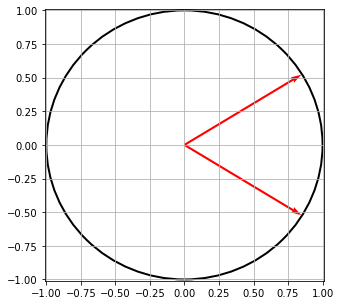

In [27]:
e_vals, e_vectors = np.linalg.eig(U.data)

print('eigen value 1:', e_vals[0])
print('eigen value 2:', e_vals[1])
print('eigen vector 1:', e_vectors[:, 0])
print('eigen vector 2:', e_vectors[:, 1])

Lambda = np.array([[e_vals[0], 0], [0, e_vals[1]]])
Q = np.stack([e_vectors[:, 0], e_vectors[:, 1]], axis=1)
Q_inv = np.linalg.inv(Q)
print(np.dot(Q, np.dot(Lambda, Q_inv)))


fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_xlim([-1.01, 1.01])
ax.set_ylim([-1.01, 1.01])
circle = plt.Circle((0, 0), 1, fill=False, linewidth=2)
ax.add_patch(circle)
Ox = [0, 0]
Oy = [0, 0]
Vx = [e_vals[0].real, e_vals[1].real]
Vy = [e_vals[0].imag, e_vals[1].imag]
color = ['r', 'r']
plt.quiver(Ox, Oy, Vx, Vy, units='xy', color=color, scale=1)
plt.grid()
plt.show()

# 2 The Initial State by Hill Climbing and Guess | Visualization

In [31]:
num_sensor = 3
theta = 70
seed =  2
RAD = 180/np.pi

unitary_operator = Utility.generate_unitary_operator(theta, seed)
Utility.print_matrix('Unitary Operator:', unitary_operator.data)

Unitary Operator:
( 0.34202+0.79335i) ( 0.36086-0.35128i) 
(-0.36086-0.35128i) ( 0.34202-0.79335i) 


In [32]:
# read from the logs

# logs = ['../result/5.11.2022/verify']
logs = ['../result/7.11.2022/verify']
data = Logger.read_log(logs)
initstate_hills = []
initstate_guess = QuantumState(num_sensor)

guess = False
for experiment in data:
    myinput = experiment[0]
#     if myinput.unitary_theta != 31:
#         continue
#     print(myinput)
    output_by_method = experiment[1]
    if 'Hill climbing' in output_by_method:
        # print(output_by_method['Hill climbing'].init_state)
        init_state = QuantumState(num_sensor)
        init_state.set_statevector_from_str(output_by_method['Hill climbing'].init_state)
        initstate_hills.append([init_state, output_by_method['Hill climbing'].success])

    if 'Guess' in output_by_method and guess is False:
        guess = True
        print(myinput)
        print(output_by_method['Guess'].init_state)
        initstate_guess.set_statevector_from_str(output_by_method['Guess'].init_state)
        for cplx in initstate_guess.state_vector:
            print(round(abs(cplx)**2, 4), end=' ')
        print()
        print(f"Guess success rate = {output_by_method['Guess'].success}\n")

{"experiment_id": 0, "num_sensor": 3, "priors": [0.3333, 0.3333, 0.3333], "unitary_seed": 2, "unitary_theta": 70.0}

Theorem
Initial state:
|000>:  0.630197  0.294326i
|001>:  0.321931  0.071565i
|010>:  0.321931  0.071565i
|011>: -0.183721  0.158921i
|100>:  0.321931  0.071565i
|101>: -0.183721  0.158921i
|110>: -0.183721  0.158921i
|111>:  0.002986 -0.113598i

0.4838 0.1088 0.1088 0.059 0.1088 0.059 0.059 0.0129 
Guess success rate = 0.9999496



In [33]:
for i, (qstate, prob) in enumerate(initstate_hills):
    print(i)
    print(qstate)
    for cplx in qstate.state_vector:
        print(round(abs(cplx)**2, 4), end=' ')
    print()
    print(prob)
    print()

0
|000>: -0.051921  0.427669i
|001>:  0.212385  0.129962i
|010>:  0.005434  0.276798i
|011>: -0.249201  0.320642i
|100>:  0.207427 -0.124092i
|101>:  0.346764 -0.039014i
|110>:  0.094860  0.345895i
|111>: -0.335407 -0.299189i

0.1856 0.062 0.0766 0.1649 0.0584 0.1218 0.1286 0.202 
1.0000024



In [34]:
print('Hill climb initial state:\n')
for cplx in init_state.state_vector:
    print(cplx, 'abs =', abs(cplx)**2)

Hill climb initial state:

(-0.051921+0.427669j) abs = 0.18559656380200004
(0.212385+0.129962j) abs = 0.061997509669
(0.005434+0.276798j) abs = 0.07664666115999999
(-0.249201+0.320642j) abs = 0.164912430565
(0.207427-0.124092j) abs = 0.05842478479299999
(0.346764-0.039014j) abs = 0.12176736389200002
(0.09486+0.345895j) abs = 0.128641770625
(-0.335407-0.299189j) abs = 0.20201191337


In [35]:
print('Guess initial state:\n')
for cplx in initstate_guess.state_vector:
    print(cplx, 'abs =', abs(cplx)**2)

Guess initial state:

(0.630197+0.294326j) abs = 0.483776053085
(0.321931+0.071565j) abs = 0.10876111798600004
(0.321931+0.071565j) abs = 0.10876111798600004
(-0.183721+0.158921j) abs = 0.059009290082
(0.321931+0.071565j) abs = 0.10876111798600004
(-0.183721+0.158921j) abs = 0.059009290082
(-0.183721+0.158921j) abs = 0.059009290082
(0.002986-0.113598j) abs = 0.012913421800000002


# 3 Prepare the States to be Discriminated from the Initial State

## 3.1 Hill Climbing

In [36]:
index = 0
quantum_states_hill = []

for i in range(num_sensor):
    evolve_operator = Utility.evolve_operator(unitary_operator, num_sensor, i)
    init_state_copy = copy.deepcopy(initstate_hills[index][0])
    init_state_copy.evolve(evolve_operator)
    quantum_states_hill.append(init_state_copy)
    
for state in quantum_states_hill:
    print(state)

|000>: -0.325787 -0.012564i
|001>:  0.080964  0.077057i
|010>: -0.062003  0.190480i
|011>: -0.565747 -0.078183i
|100>:  0.141462 -0.343095i
|101>:  0.056659 -0.409953i
|110>:  0.402132 -0.058749i
|111>: -0.149517  0.135597i

|000>: -0.257856  0.203057i
|001>: -0.007759  0.416192i
|010>:  0.390423 -0.045732i
|011>:  0.138161  0.185866i
|100>:  0.325129  0.213619i
|101>: -0.076582  0.271616i
|110>:  0.188417  0.014962i
|111>: -0.490917  0.056036i

|000>: -0.234755  0.077372i
|001>:  0.344712 -0.260137i
|010>: -0.195033  0.302228i
|011>:  0.264421  0.205575i
|100>:  0.280822 -0.013768i
|101>: -0.030795 -0.316533i
|110>: -0.468106  0.203415i
|111>: -0.264805  0.005624i



### 3.1.1 Hill Climb Check Orthogonal: the absolute value is very close to zero

In [37]:
n = len(quantum_states_hill)
for i in range(n):
    for j in range(i + 1, n):
        val = np.dot(np.conj(quantum_states_hill[i].state_vector), quantum_states_hill[j].state_vector)
        print(f'<state_{i}|state_{j}> = {val}, absolute value = {abs(val):.6f}')

<state_0|state_1> = (0.00018364559306063843+5.633436707823403e-05j), absolute value = 0.000192
<state_0|state_2> = (-2.0806400933270908e-06+0.00020682797177842827j), absolute value = 0.000207
<state_1|state_2> = (-2.062625117274508e-05+0.00015049360470018036j), absolute value = 0.000152


# 3.2 Guess

In [38]:
initstate_guess_copy = copy.deepcopy(initstate_guess)

In [39]:
print(initstate_guess)

|000>:  0.630197  0.294326i
|001>:  0.321931  0.071565i
|010>:  0.321931  0.071565i
|011>: -0.183721  0.158921i
|100>:  0.321931  0.071565i
|101>: -0.183721  0.158921i
|110>: -0.183721  0.158921i
|111>:  0.002986 -0.113598i



In [40]:
initstate_guess_copy.state_vector[0] = 0.264331 - 0.271545j

In [41]:
quantum_states_guess = []

for i in range(num_sensor):
    evolve_operator = Utility.evolve_operator(unitary_operator, num_sensor, i)
    init_state_copy = copy.deepcopy(initstate_guess_copy)
    init_state_copy.evolve(evolve_operator)
    quantum_states_guess.append(init_state_copy)

In [42]:
for state in quantum_states_guess:
    print(state)

|000>:  0.447149  0.029572i
|001>:  0.042858  0.401766i
|010>:  0.042858  0.401766i
|011>: -0.227743 -0.133443i
|100>: -0.023891 -0.225790i
|101>: -0.027790  0.061198i
|110>: -0.027790  0.061198i
|111>:  0.033021 -0.034034i

|000>:  0.447149  0.029572i
|001>:  0.042858  0.401766i
|010>: -0.023891 -0.225790i
|011>: -0.027790  0.061198i
|100>:  0.042858  0.401766i
|101>: -0.227743 -0.133443i
|110>: -0.027790  0.061198i
|111>:  0.033021 -0.034034i

|000>:  0.447149  0.029572i
|001>: -0.023891 -0.225790i
|010>:  0.042858  0.401766i
|011>: -0.027790  0.061198i
|100>:  0.042858  0.401766i
|101>: -0.027790  0.061198i
|110>: -0.227743 -0.133443i
|111>:  0.033021 -0.034034i



### 3.2.1 Guess Check Orthogonal: absolute value far away from zero

In [43]:
n = len(quantum_states_guess)
for i in range(n):
    for j in range(i + 1, n):
        val = np.dot(np.conj(quantum_states_guess[i].state_vector), quantum_states_guess[j].state_vector)
        print(f'<state_{i}|state_{j}> = {val}, absolute value = {abs(val):.6f}')

<state_0|state_1> = (0.18368316416544508+0j), absolute value = 0.183683
<state_0|state_2> = (0.1836831641654451+0j), absolute value = 0.183683
<state_1|state_2> = (0.18368316416544506+0j), absolute value = 0.183683


# 4 Let's do the Measurement!

## 4.1 Hill Climbing: Use Semidefinite Programming to Generate the POVM

In [44]:
povm_hill = Povm()

priors = [1./3, 1./3, 1./3]   # equal priors
povm_hill.semidefinite_programming_minerror(quantum_states_hill, priors, debug=False)

In [45]:
print(f'The theoretical success rate = {povm_hill.theoretical_success}')
print(f'The theoretical error rate = {povm_hill.theoretical_error}')

The theoretical success rate = 1.0000014231488277
The theoretical error rate = -1.4231488276728044e-06


## 4.2 Hill climbing: Let's do the Quantum Measurement Simulation

In [46]:
simulate_seed = 0
repeat = 1_000_000
qm = QuantumMeasurement()
qm.preparation(quantum_states_hill, priors)
qm.povm = povm_hill
error = qm.simulate(simulate_seed, repeat)
print(f'The simulated error = {error}')

The simulated error = 1e-06


In [47]:
print(f'Hill climbing: the simulated error ({error}) is very close to the theoretical error ({povm_hill.theoretical_error})')

Hill climbing: the simulated error (1e-06) is very close to the theoretical error (-1.4231488276728044e-06)


## 4.3 Guess: Use the Pretty Good Measurement to Generate the POVM and do Measurement Simulation

In [48]:
povm_guess = Povm()
povm_guess.pretty_good_measurement(quantum_states_guess, priors, debug=False)

In [49]:
simulate_seed = 0
repeat = 1_000_000
qm = QuantumMeasurement()
qm.preparation(quantum_states_guess, priors)
qm.povm = povm_guess
guess_prettygood_error = qm.simulate(simulate_seed, repeat)

In [50]:
print(f'Guess: pretty good measurement, the simulated error = {guess_prettygood_error}')

Guess: pretty good measurement, the simulated error = 0.36333


## 4.4 Guess: Use the Semidefinite Programming to Generate the POVM and do Measurement Simulation

In [51]:
povm_guess.semidefinite_programming_minerror(quantum_states_guess, priors, debug=False)

In [52]:
simulate_seed = 0
repeat = 1_000_000
qm = QuantumMeasurement()
qm.preparation(quantum_states_guess, priors)
qm.povm = povm_guess
guess_sdp_error = qm.simulate(simulate_seed, repeat)

In [53]:
print(f'Guess: semidefinte programming, the simulated error = {guess_sdp_error}')

Guess: semidefinte programming, the simulated error = 0.363318


In [54]:
print(f'Guess: the pretty good measurement simulated error ({guess_prettygood_error}) is very close to the SDP simulated error ({guess_sdp_error})')

Guess: the pretty good measurement simulated error (0.36333) is very close to the SDP simulated error (0.363318)


# 5 Lemma 3

In [34]:
def generate_pyramid_states(n: int, x: float) -> list:
    '''Note that the coefficients are real numbers instead of complex numbers
    Params:
        n -- number of qubits
        x -- <q|q> = x
    Return:
        a list of QuantumState
    '''
    qstates = []
    state = np.zeros(2 ** n)
    state[0] = 1
    qstates.append(state)
    for i in range(1, n):
        prev_state = qstates[-1]
        state = np.zeros(2 ** n)
        # 0 ~ i-2: copy
        summ = 0
        for j in range(i-1):
            state[j] = prev_state[j]
            summ += state[j] * prev_state[j]
        # i-1: <phi|phi> = x
        state[i-1] = (x - summ) / prev_state[i-1]
        # i: normalization
        summ = 0
        for j in range(i):
            summ += state[j] ** 2
        state[i] = np.sqrt(1 - summ)
        qstates.append(state)
    return qstates

In [44]:
n = 5
x = 0.999
qstates = generate_pyramid_states(n, x)
for state in qstates:
    print(list(state)[:n])

[1.0, 0.0, 0.0, 0.0, 0.0]
[0.999, 0.04471017781221601, 0.0, 0.0, 0.0]
[0.999, 0.02234390577008662, 0.03872660422677808, 0.0, 0.0]
[0.999, 0.02234390577008662, 0.012904562249017065, 0.03651331466874409, 0.0]
[0.999, 0.02234390577008662, 0.012904562249017065, 0.009126044872172744, 0.0353544545013746]


In [39]:
for i in range(n):
    print(f'{i}: check normalization = {np.sum(qstates[i]**2)}')
    for j in range(i):
        print(f'{i}-{j}: {np.dot(qstates[i], qstates[j])}')

0: check normalization = 1.0
1: check normalization = 0.9999999999999999
1-0: 0.5
2: check normalization = 1.0
2-0: 0.5
2-1: 0.5
3: check normalization = 1.0
3-0: 0.5
3-1: 0.5
3-2: 0.5
4: check normalization = 1.0
4-0: 0.5
4-1: 0.5
4-2: 0.5
4-3: 0.5
